<a href="https://colab.research.google.com/github/ruoroj/Catsn-Dogs/blob/main/CandD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade jupyter_http_over_ws>=0.0.7 && \
  jupyter serverextension enable --py jupyter_http_over_ws

# 1. Defining the Question

### Understanding the Context

The database is composed of several hundred images of cats and Dogs. Using these images we will train a amchine learning model to predict the difference between cats and dogs. 

### Specifying the Question

This dataset was first introduced to users in a Kaggle competition in 2013, whose goal was to write an algorithm to classify whether images contain either a dog or a cat. Since then, users have used the dataset for image recognition practice.
 

### Metrics for Success

The metric of success for this project is the model accuracy. The model accuracy shows how well a particular model predicts the dependent variable when tested after training it. The accuracy will be derived using the accuracy score. An accuracy that is low shows our model fails to accurately predict the dependent variable and the data may be underfit while an accuracy of 1 is not good either since the model is overfitted. In this project, my aim is to achieve an accuracy of at least 80%.

### The Experimental Design

The experimental design for this project is as follows:

- Loading the libraries and dataset
- Data cleaning and preparation
- Performing EDA
- Making predictions using the different models that I've created
- Assesing the accuracy of the models created
- Making conclusions

# 2. Reading the Data

In [ ]:
# Importing the libraries

import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import scipy as sp
import tensorflow as tf
import warnings
import cv2

warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
from google.colab import drive
drive.mount('/content/drive')
from zipfile import ZipFile as zf
import shutil
import random
from matplotlib import pyplot as plt



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Extracting data from G-Drive
test_zip = zf('/content/drive/MyDrive/tempdf_storage/cand/test1.zip', 'r')
test_zip.extractall('./tmp')
test_zip.close()
train_zip = zf('/content/drive/MyDrive/tempdf_storage/cand/train.zip', 'r')
train_zip.extractall('./tmp')
train_zip.close()

# Perform EDA

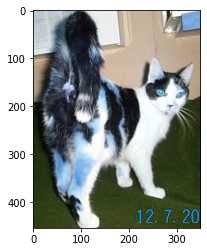

In [ ]:
# Checking if there is content in the train data

train_data = '/content/tmp/train/'

x = os.listdir(train_data)
for img in os.listdir(train_data):
  img_array = cv2.imread(os.path.join(train_data, img))
  plt.imshow(img_array)
  plt.show()
  break

In [ ]:
# Making a directory to store cata and dog pictures separately.

images = './tmp/train'
pet_images = './pet-images'
cats = os.path.join(pet_images,'cat')
dogs = os.path.join(pet_images,'dog')
os.mkdir(pet_images)
os.mkdir(cats)
os.mkdir(dogs)

In [ ]:
# Spliting the cats and dog images into different folders

for i in os.listdir(images):
    if i.split('.')[0] == 'cat':
        src = os.path.join(images,i)
        dst = os.path.join(cats,i)
        shutil.copyfile(src,dst)
    elif i.split('.')[0] == 'dog':
        src = os.path.join(images,i)
        dst = os.path.join(dogs,i)
        shutil.copyfile(src,dst)

12500
12500


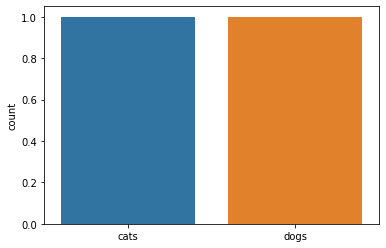

In [ ]:
# Check the number of images in each folder

y = print(len(os.listdir(cats)))
x = print(len(os.listdir(dogs)))

sns.countplot(os.listdir(train))

# Model Preprocessing. 

In [ ]:
# Spliting the images into training and validation sets

base_dir = './dogs-vs-cats'
os.mkdir(base_dir)
train = os.path.join(base_dir,'training')
validation = os.path.join(base_dir,'validation')
train_cat = os.path.join(train,'cats')
train_dog = os.path.join(train,'dogs')
validation_cat = os.path.join(validation,'cats')
validation_dog = os.path.join(validation,'dogs')


In [ ]:
# Defining the test folder and populating it with data

test_images = './tmp/test1'
test = os.path.join(base_dir,'test')
test_folder = os.path.join(test,'test_folder')
os.mkdir(test)
os.mkdir(test_folder)

for i in os.listdir(test_images):
    src = os.path.join(test_images,i)
    dst = os.path.join(test_folder,i)
    shutil.copyfile(src,dst)

In [ ]:
# Check the length of the test folder
print(len(os.listdir(test_folder)))

12500


In [ ]:
# Making the directories of the train, and validation datasets. 

os.mkdir(train)
os.mkdir(validation)
os.mkdir(train_cat)
os.mkdir(train_dog)
os.mkdir(validation_cat)
os.mkdir(validation_dog)

In [ ]:
# Defining Function of spliting the dataset into 

def split_data(source,training,validation,split):
    data = os.listdir(source)
    data = random.sample(data,len(data))
    for id,file in enumerate(data):
        if (os.path.getsize(source) != 0) and (id < len(data) * split):
            src = os.path.join(source,file)
            dst = os.path.join(training,file)
            shutil.copyfile(src,dst)
        elif (os.path.getsize(source) != 0) and (id >= len(data) * split):
            src = os.path.join(source,file)
            dst = os.path.join(validation,file)
            shutil.copyfile(src,dst)
            
split = 0.8
split_data(cats,train_cat,validation_cat,split)
split_data(dogs,train_dog,validation_dog,split)

In [ ]:
# Check the length of the differnet splits

print(len(os.listdir(train_cat)))
print(len(os.listdir(train_dog)))
print(len(os.listdir(validation_cat)))
print(len(os.listdir(validation_dog)))

10000
10000
2500
2500


## Tensorflow Modelling 

In [ ]:
# Imorting libraries needed for Tensorflow modelling

from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
WIDTH = 150
HEIGHT = 150
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
# Defining the convolution  layers

model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(WIDTH, HEIGHT, 3)))
model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       36992     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        7

In [ ]:
# Compiling the model

model.compile(loss="binary_crossentropy", 
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=["binary_accuracy"])
print(" Model compiled.")

 Model compiled.


In [ ]:
# Generating tensor images

datagen = ImageDataGenerator(rescale=1./255,
                            #featurewise_center=True,
                            #featurewise_std_normalization=True,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=True,
                            fill_mode='nearest'
                            )

valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Defining the model's parameters

train_generator = datagen.flow_from_directory('/content/dogs-vs-cats/training',
                                             target_size=(150,150),
                                             batch_size=64,
                                             class_mode='binary'
                                             )

validation_generator = valid_datagen.flow_from_directory('/content/dogs-vs-cats/validation',
                                           target_size=(150,150),
                                           batch_size=64,
                                           class_mode='binary'
                                           )

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
# Running the 20 epochs

history = model.fit(train_generator,
                       steps_per_epoch=50,
                       epochs=20,
                       validation_data=validation_generator,
                       validation_steps=20,
                       
                   )

Epoch 1/20
50/50 [==============================] - 27s 539ms/step - loss: 0.5007 - acc: 0.7528 - val_loss: 0.4902 - val_acc: 0.7672
Epoch 2/20
50/50 [==============================] - 26s 532ms/step - loss: 0.4870 - acc: 0.7600 - val_loss: 0.4986 - val_acc: 0.7606
Epoch 3/20
50/50 [==============================] - 26s 536ms/step - loss: 0.4988 - acc: 0.7559 - val_loss: 0.4607 - val_acc: 0.7766
Epoch 4/20
50/50 [==============================] - 26s 530ms/step - loss: 0.5074 - acc: 0.7443 - val_loss: 0.4579 - val_acc: 0.7781
Epoch 5/20
50/50 [==============================] - 26s 533ms/step - loss: 0.4977 - acc: 0.7597 - val_loss: 0.4526 - val_acc: 0.7852
Epoch 6/20
50/50 [==============================] - 26s 535ms/step - loss: 0.5041 - acc: 0.7497 - val_loss: 0.5083 - val_acc: 0.7467
Epoch 7/20
50/50 [==============================] - 26s 537ms/step - loss: 0.5129 - acc: 0.7462 - val_loss: 0.4447 - val_acc: 0.7844
Epoch 8/20
50/50 [==============================] - 27s 538ms/step - 

The accuracy of the model is about 80.16%. This is good as we have achieved out metric of success. 




# Metrics

Let us visualize the metrics of the model as it performed in the different epochs. 

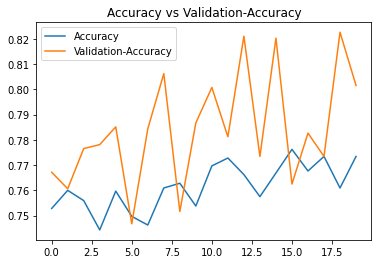

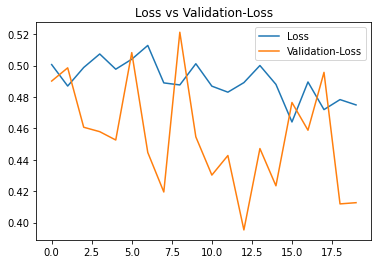

In [ ]:
# Getting the metrics and visualizing their performance for differet epochs

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(len(acc))

plt.title('Accuracy vs Validation-Accuracy')
plt.plot(epoch,acc,label='Accuracy')
plt.plot(epoch,val_acc,label='Validation-Accuracy')
plt.legend()
plt.figure()

plt.title('Loss vs Validation-Loss')
plt.plot(epoch,loss,label='Loss')
plt.plot(epoch,val_loss,label='Validation-Loss')
plt.legend()

# Conclusion

The model has an accuracy score of 80%. Hence, the project can be considered successfull. The metrics for success included performing EDA and getting an accuracy score of above 80%. 